In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### ggplot2 is designed to work on tidy data tables (not to be confused with tibbles)
#### good to have a cheatsheet for ggplot2

`we will make this plot shown below`
![](https://rafalab.github.io/dsbook/book_files/figure-html/ggplot-example-plot-1.png)

In [3]:
library(dslabs)
data(murders)

Warning message:
"package 'dslabs' was built under R version 3.6.3"

In [9]:
# first step is to create ggplot object
p <- murders %>% ggplot()
class(p)

[1] "gg"     "ggplot"

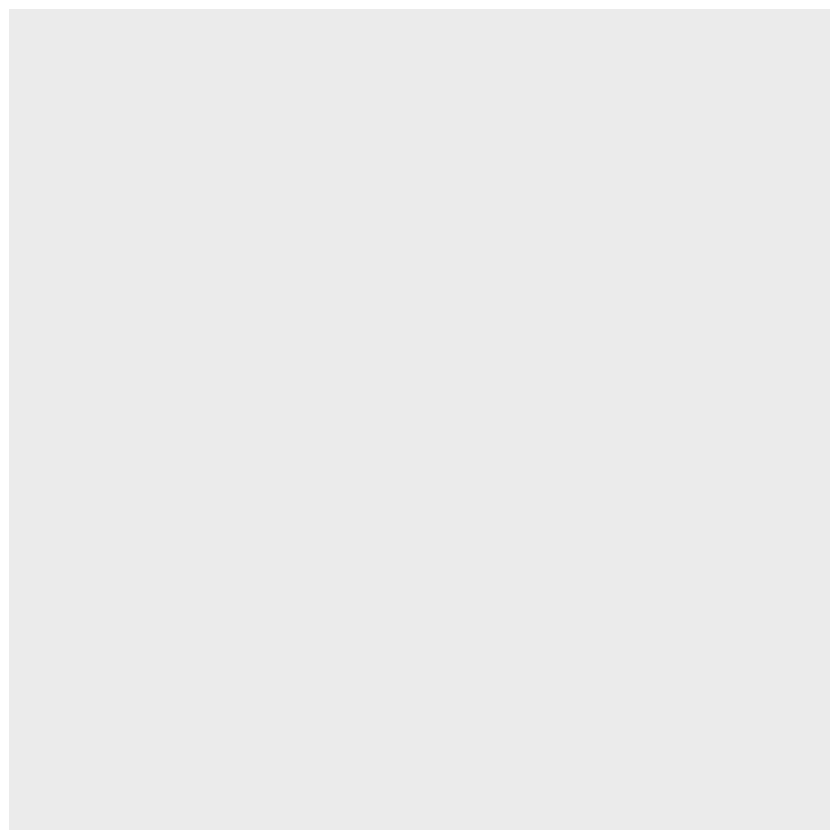

In [8]:
#rendering
# p or print(p)
p

In [11]:
# geometrics
# ggplot create graphs by adding layers
# DATA %>% ggplot() + LAYER 1 + LAYER 2 + … + LAYER N
# usually first layer defines the  geometry

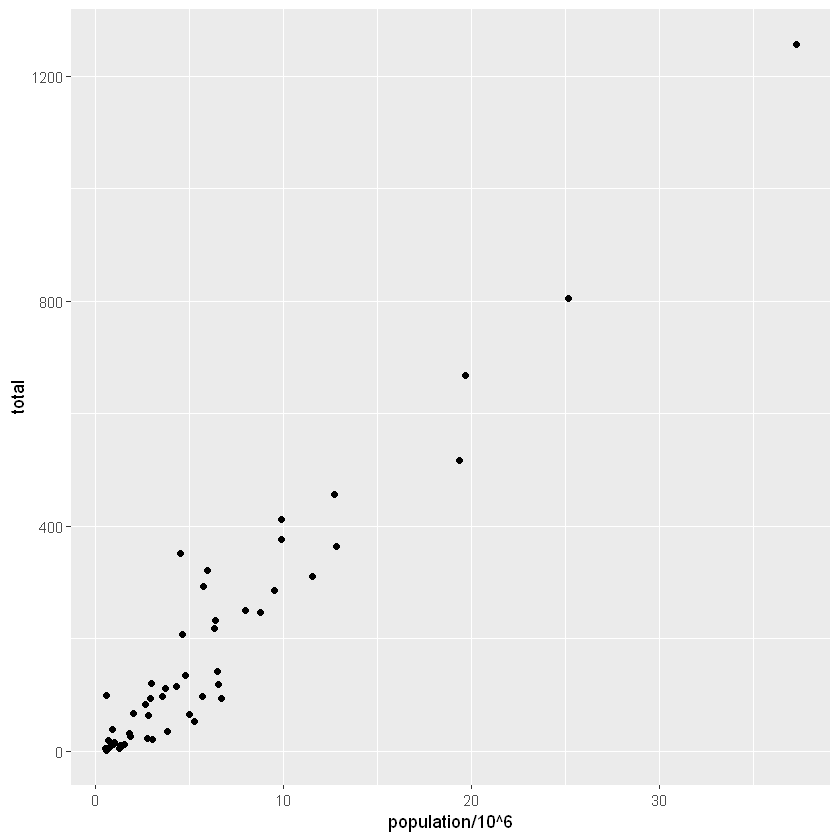

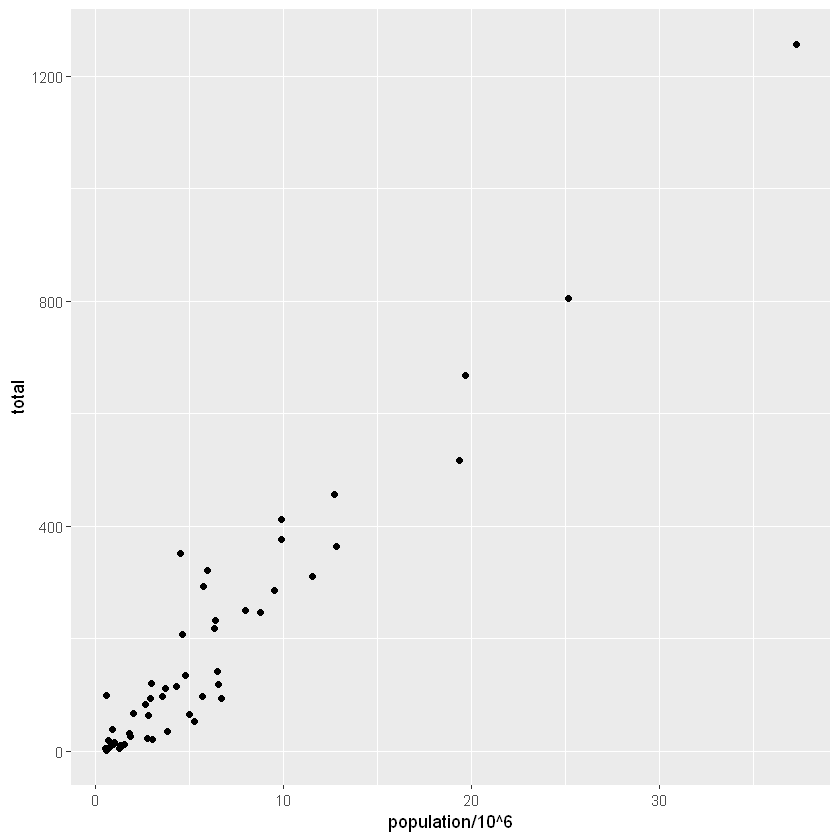

In [14]:
# for geom_point to run properly we need data and mapping, aesthetics is used to provide the mapping
murders %>% ggplot() + 
  geom_point(aes(x = population/10^6, y = total))
# or 
p + geom_point(aes(x = population/10^6, y = total))

In [16]:
# The behavior of recognizing the variables from the data component is quite specific to aes
# With most functions, if you try to access the values of population or total outside of aes you receive an error

In [17]:
# second layer in the plot we wish to make involves adding a label to each point to identify the state
# we can use geom_label or geom_text

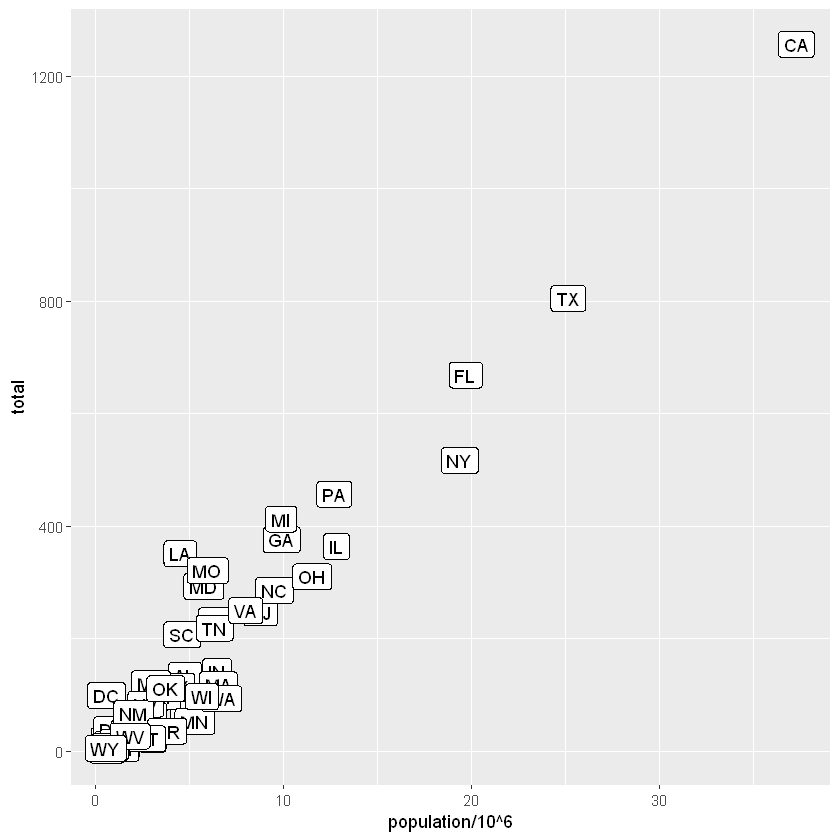

In [19]:
p + geom_label(aes(population/10^6, total, label = abb))

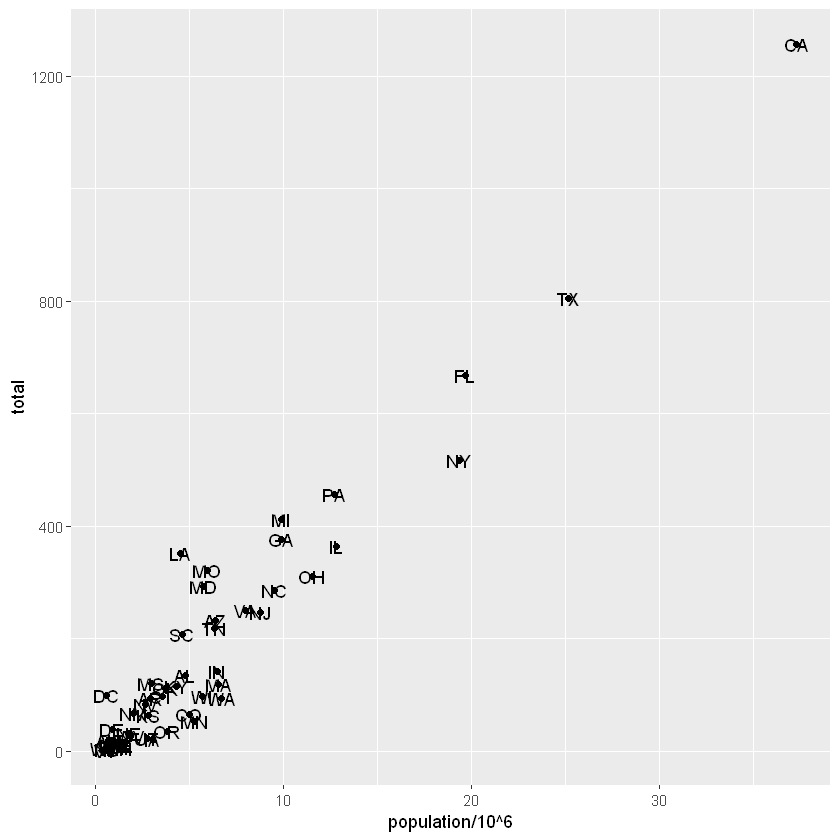

In [26]:
# combining both layers
p + geom_point(aes(population/10^6, total)) +
  geom_text(aes(population/10^6, total, label = abb))

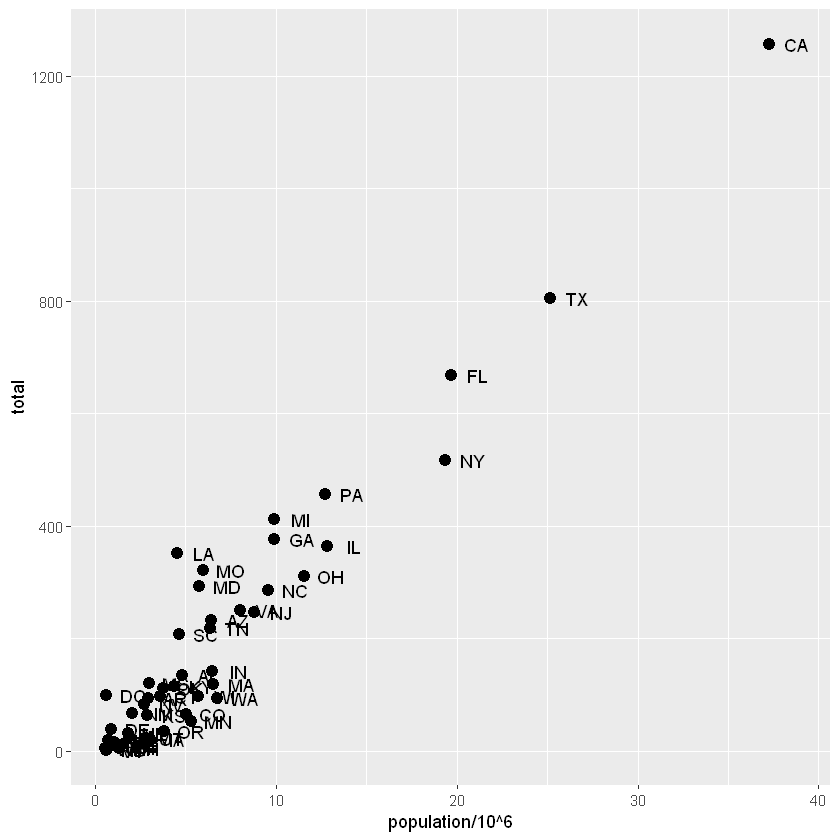

In [29]:
# tinkering
p + geom_point(aes(population/10^6, total), size = 3) +
  geom_text(aes(population/10^6, total, label = abb), , nudge_x = 1.5)

In [28]:
# size and nudge are not a mapping: whereas mappings use data from specific observations and need to be inside aes()

In [ ]:
#  Global versus local aesthetic mappings
# since we used the parameter for x and y twice  (population/10^6, total), we can define a glocal aesthetic, directly in the 
# beginning where we wrote ggplot()

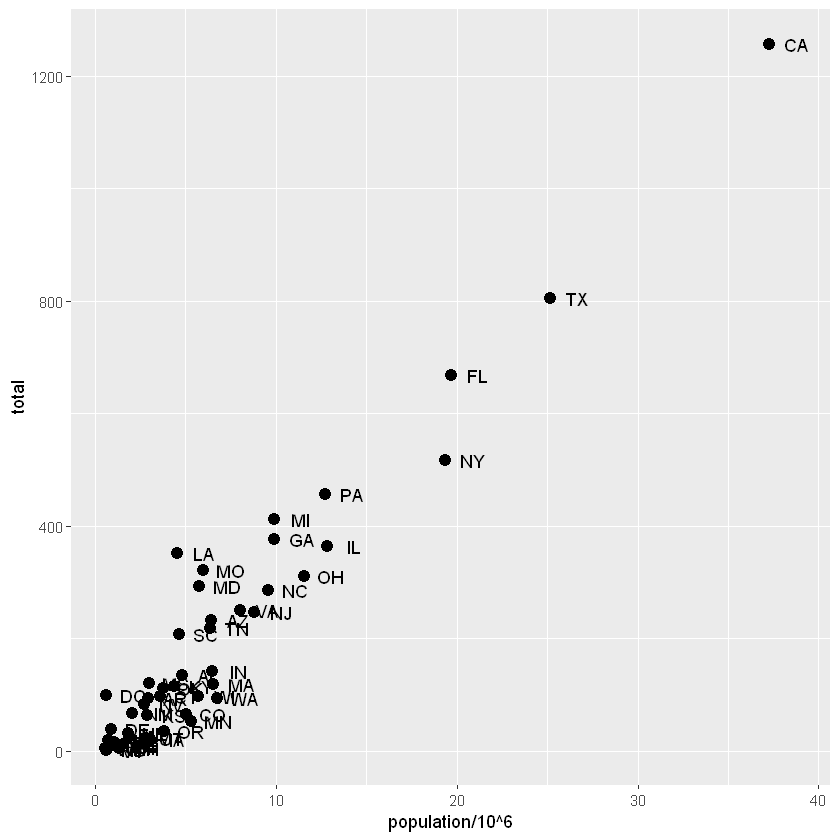

In [31]:
p <- murders %>% ggplot(aes(population/10^6, total, label = abb))
p + geom_point(size = 3) + 
  geom_text(nudge_x = 1.5)

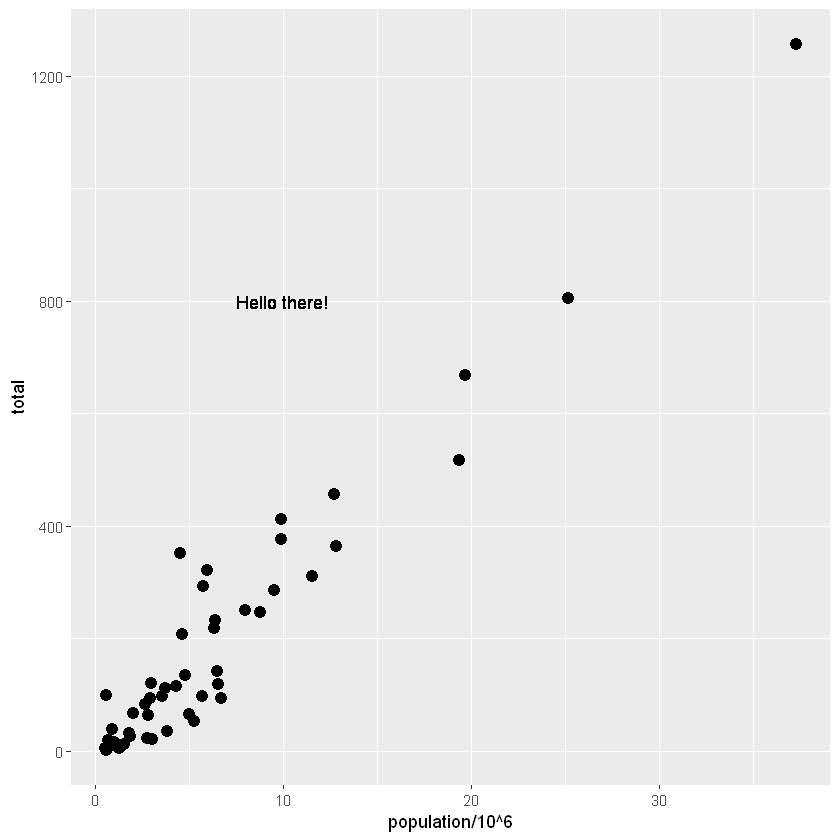

In [33]:
#  If necessary, we can override the global mapping by defining a new mapping within each layer
p + geom_point(size = 3) +  
  geom_text(aes(x = 10, y = 800, label = "Hello there!"))

### Scale


In [34]:
# scale_x_continuous function lets us control the behavior of scales

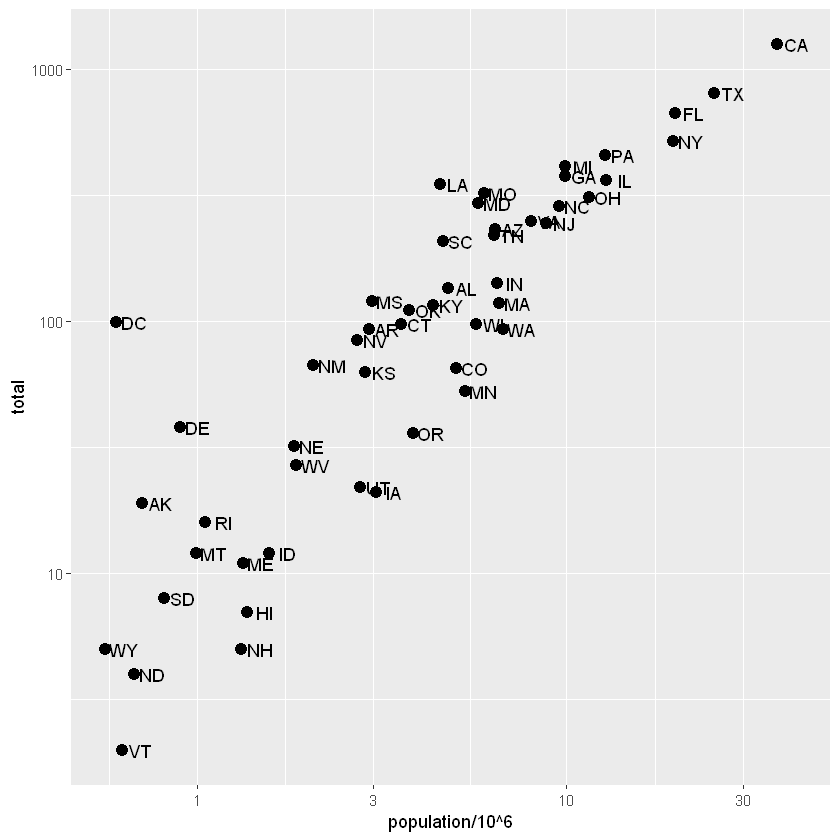

In [35]:
p + geom_point(size = 3) +  
  geom_text(nudge_x = 0.05) + 
  scale_x_continuous(trans = "log10") +
  scale_y_continuous(trans = "log10") 

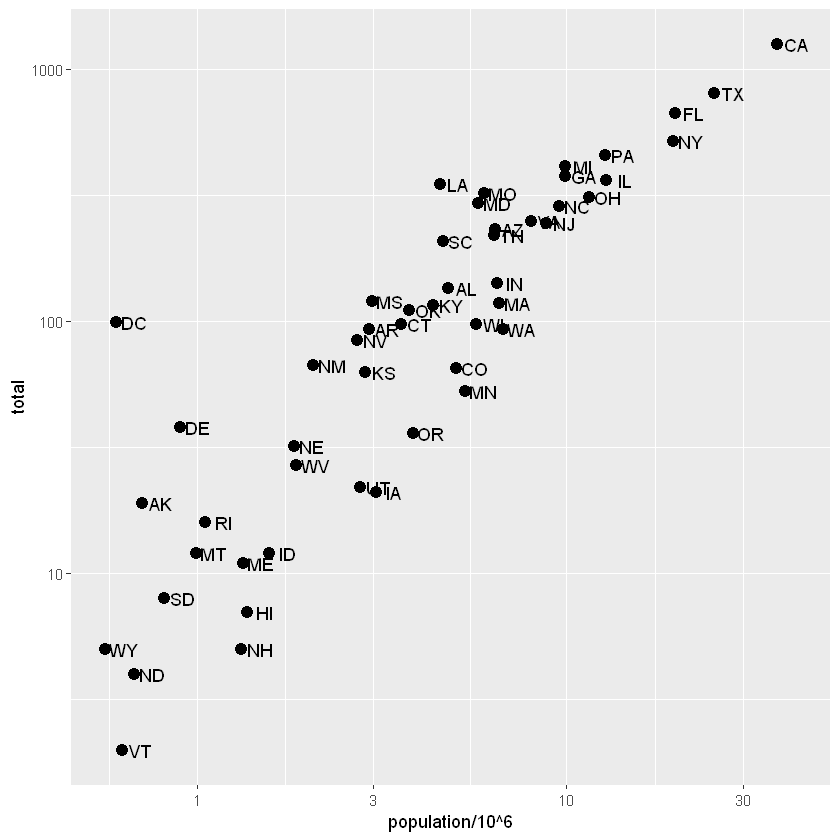

In [37]:
# or we can use this
p + geom_point(size = 3) +  
  geom_text(nudge_x = 0.05) + 
  scale_x_log10() +
  scale_y_log10() 

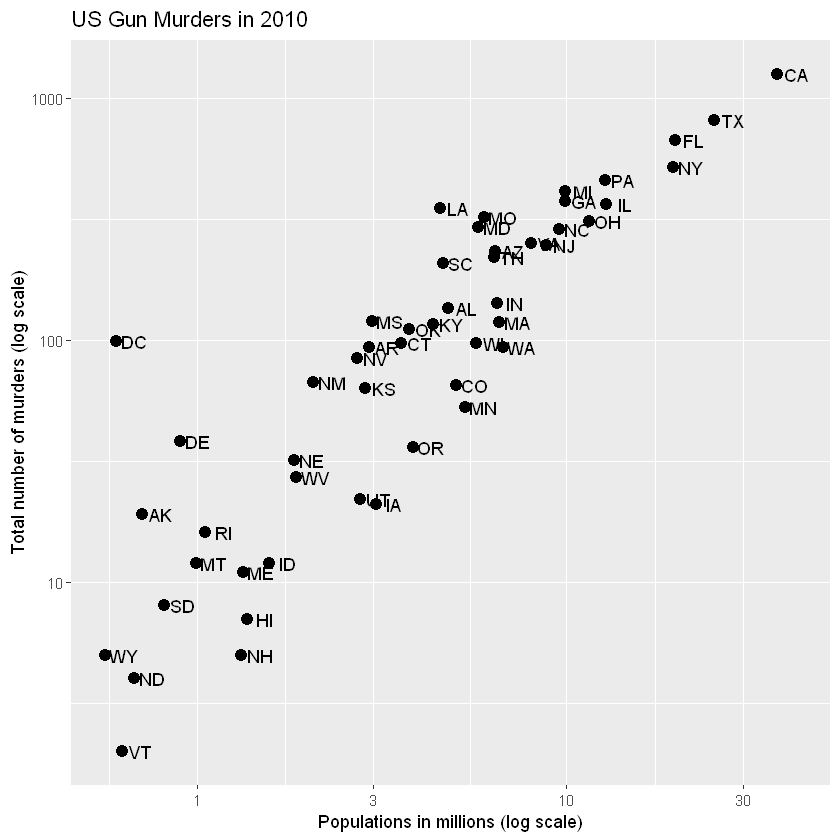

In [39]:
# labels and titles
p + geom_point(size = 3) +  
  geom_text(nudge_x = 0.05) + 
  scale_x_log10() +
  scale_y_log10() +
  xlab("Populations in millions (log scale)") + 
  ylab("Total number of murders (log scale)") +
  ggtitle("US Gun Murders in 2010")

In [40]:
# color
# choice of color is determined by a feature of each observation, this is an aesthetic mapping

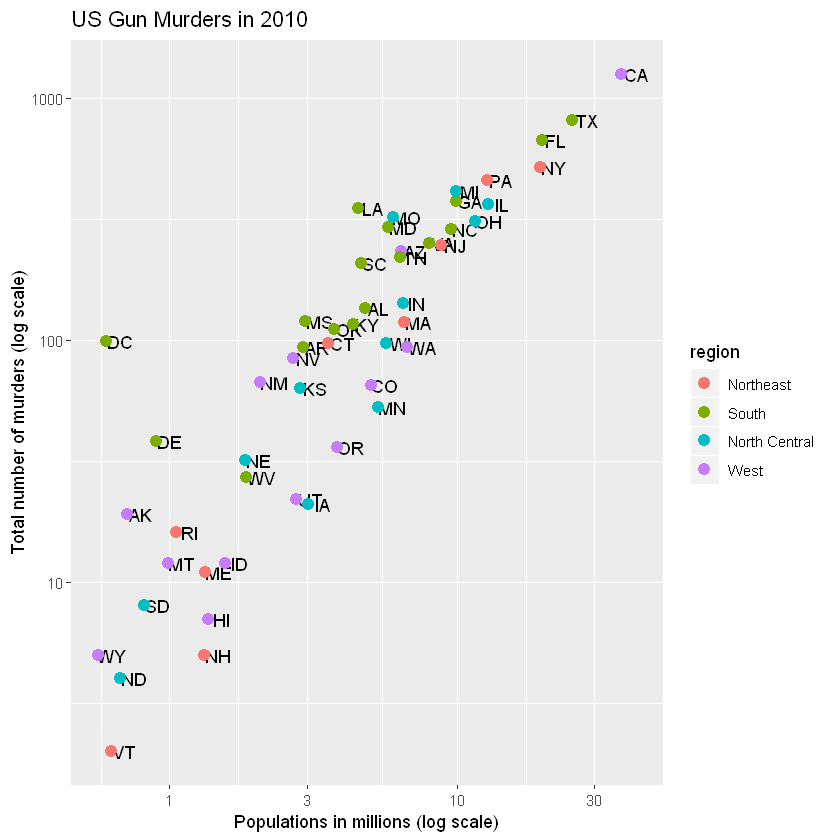

In [53]:
p <-  murders %>% ggplot(aes(population/10^6, total, label = abb)) +   
  geom_text(nudge_x = 0.05) + 
  scale_x_log10() +
  scale_y_log10() +
  xlab("Populations in millions (log scale)") + 
  ylab("Total number of murders (log scale)") +
  ggtitle("US Gun Murders in 2010")
p + geom_point(aes(col=region), size = 3)


In [42]:
# annotations, shapes and adjustment

`We often want to add shapes or annotation to figures that are not derived directly from the aesthetic mapping; examples include labels, boxes, shaded areas, and lines`

In [43]:
# we want to add a line that represents the average murder rate for the entire country

In [47]:
# getting avg rate
r <- murders %>% 
  summarize(rate = sum(total) /  sum(population) * 10^6) %>% 
  pull(rate)
r

[1] 30.34555

`this line is defined by the formula:  
y=rx, with y and x our axes: total murders and population in millions, respectively. In the log-scale this line turns into:  
log(y)=log(r)+log(x). So in our plot it’s a line with slope 1 and intercept log(r)`

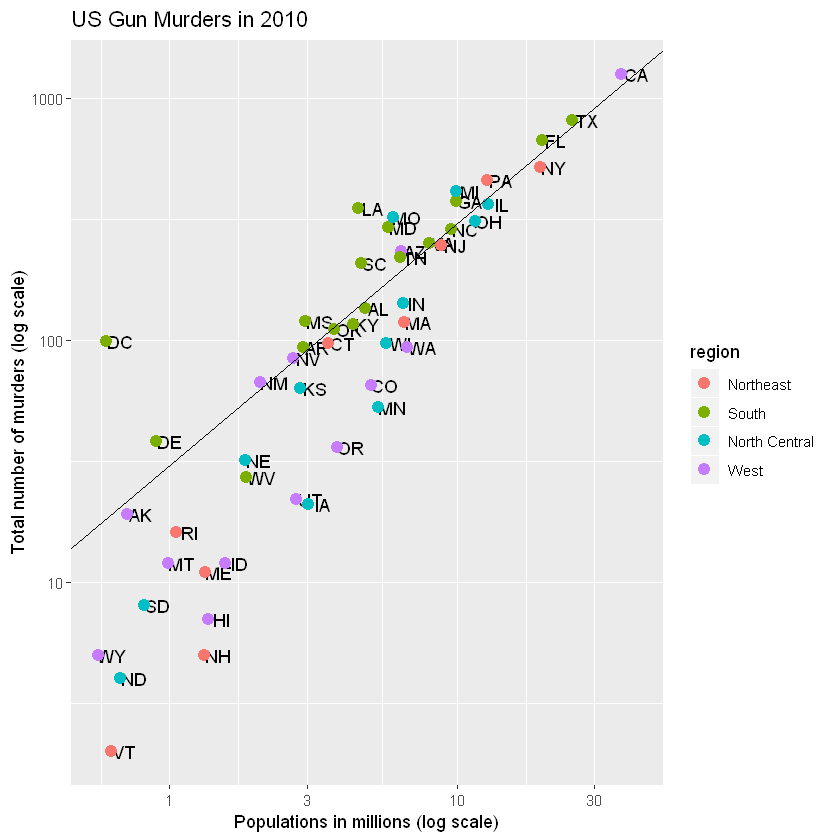

In [54]:
p + geom_point(aes(col=region), size = 3) + 
  geom_abline(intercept = log10(r))


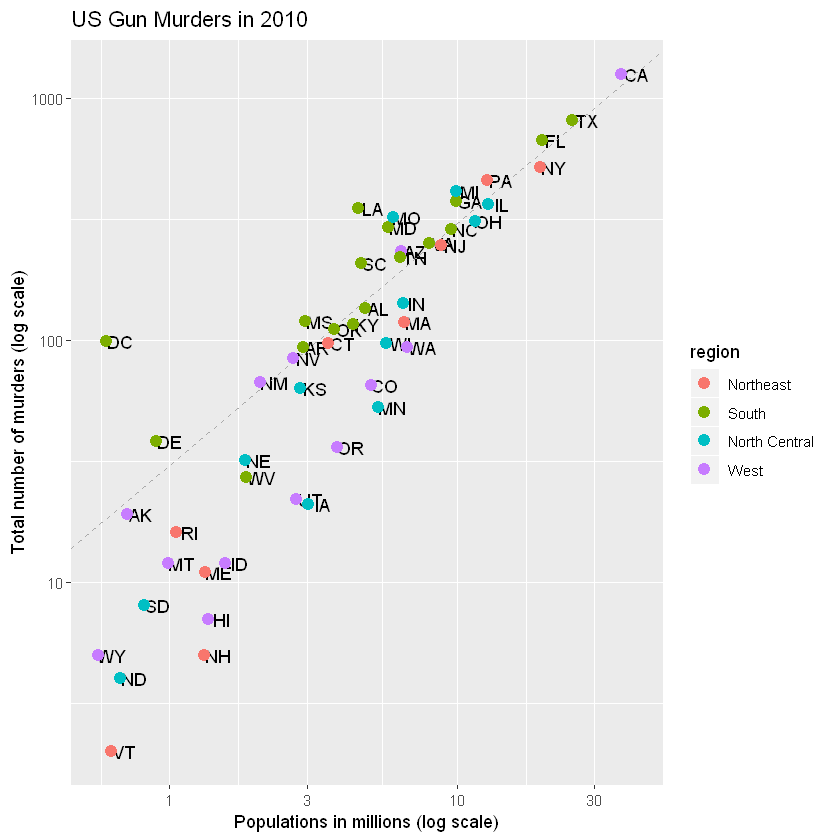

In [57]:
# redoing it
# we draw the line first so it doesn’t go over our points
#lty is line type
p <- p + geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") +
  geom_point(aes(col=region), size = 3)  
p

In [59]:
# we can make changes to the legend via the scale_color_discrete function. 
# In our plot the word region is capitalized and we can change it like this

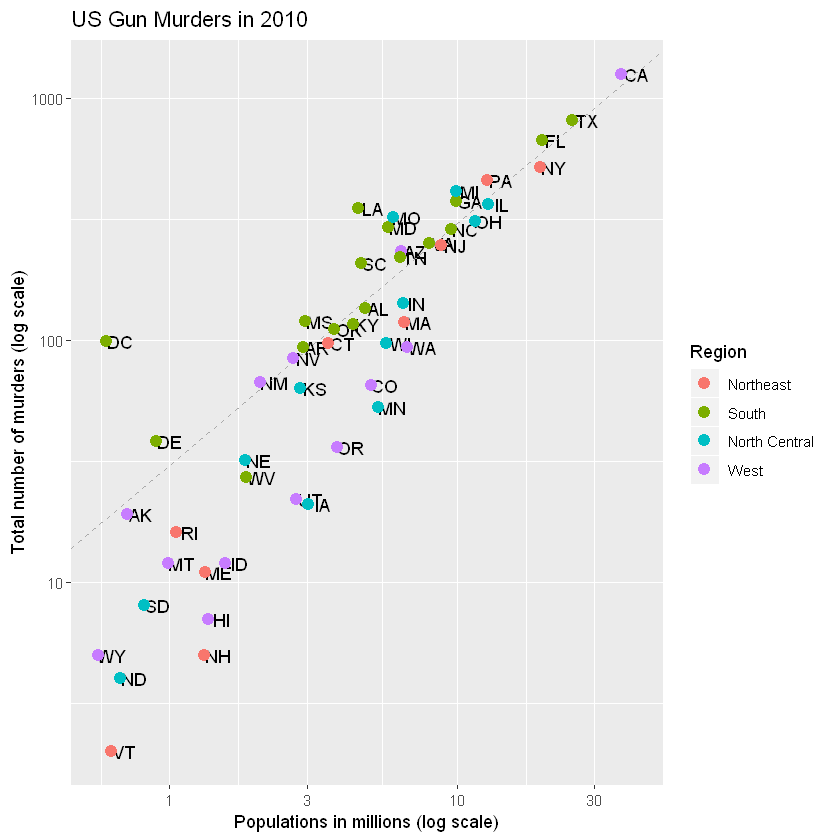

In [58]:
p <- p + scale_color_discrete(name = "Region") 
p

### add-on packages

In [63]:
# ggthemes and ggrepel
# install.packages('ggthemes')
library(ggthemes)

Installing package into 'C:/Users/solanjx/OneDrive - AbbVie Inc (O365)/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\solanjx\AppData\Local\Temp\RtmpKUyRgr\downloaded_packages


Warning message:
"package 'ggthemes' was built under R version 3.6.3"

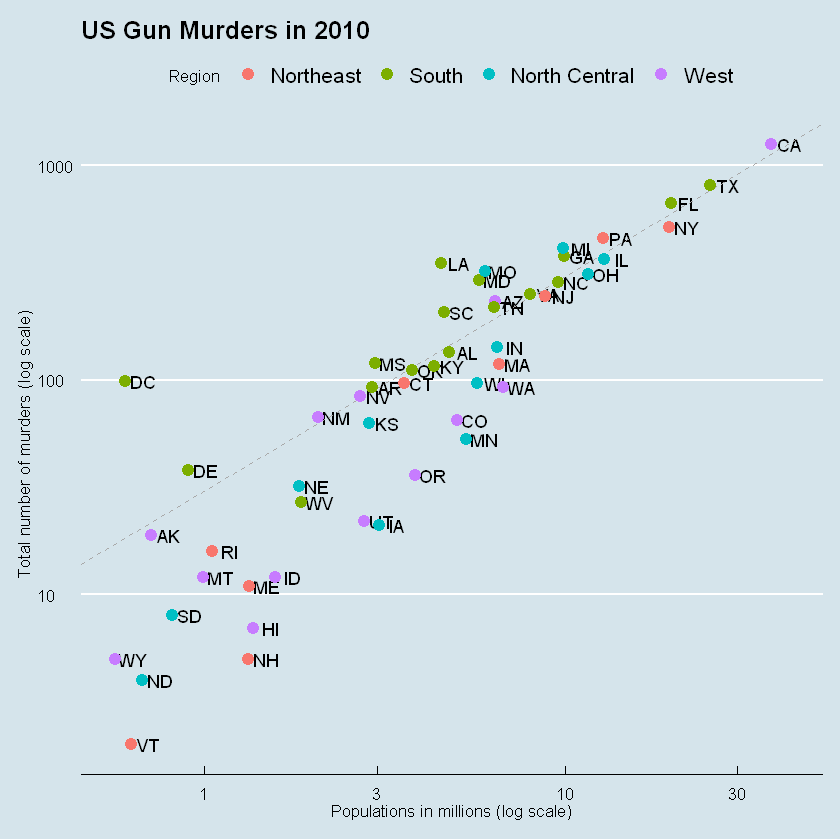

In [64]:
p + theme_economist()

In [73]:
# The add-on package ggrepel includes a geometry that adds labels while ensuring that they don’t fall on top of each other
# simply change geom_text with geom_text_repel
# install.packages('ggrepel')
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 3.6.3"

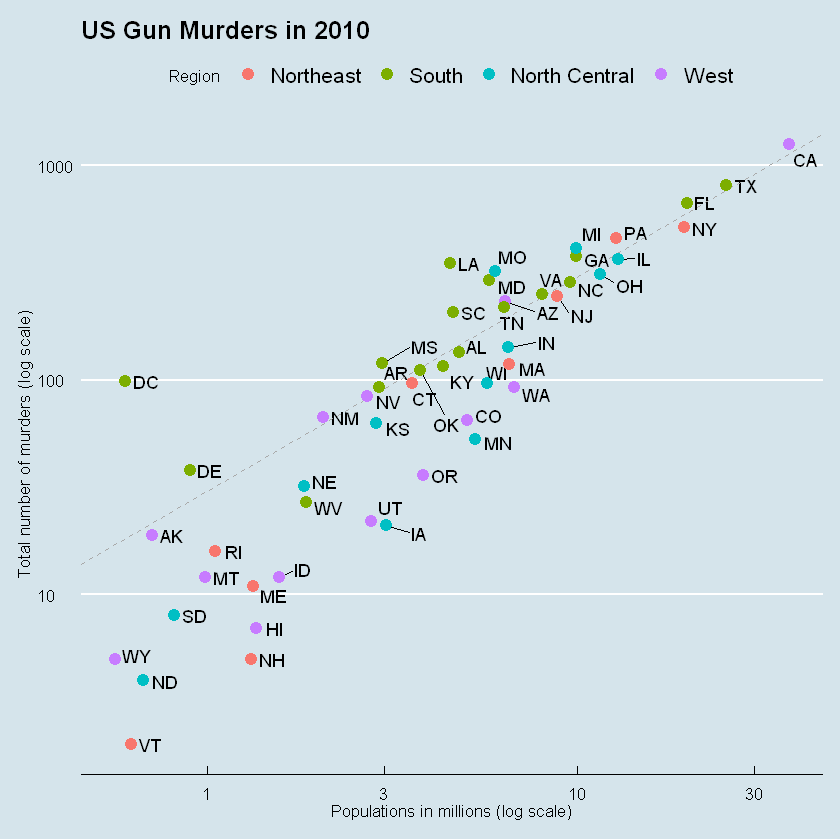

In [74]:
p <-  murders %>% ggplot(aes(population/10^6, total, label = abb)) +   
  geom_text_repel(nudge_x = 0.05) + 
  geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") +
  geom_point(aes(col=region), size = 3) +
  scale_x_log10() +
  scale_y_log10() +
  xlab("Populations in millions (log scale)") + 
  ylab("Total number of murders (log scale)") +
  ggtitle("US Gun Murders in 2010") +
  scale_color_discrete(name = "Region") +
  theme_economist()
p

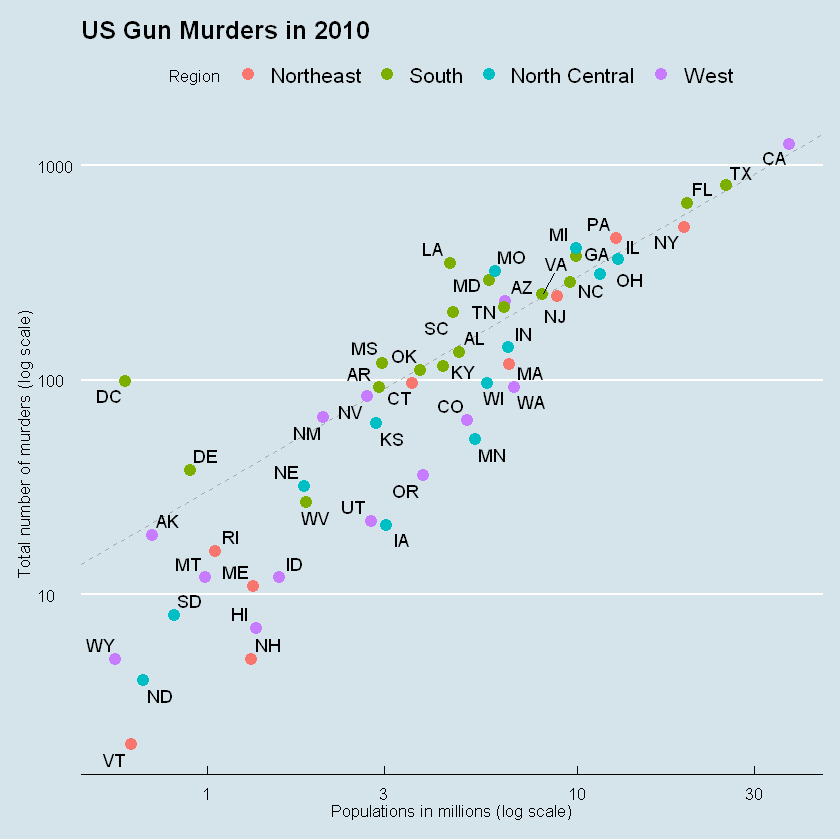

In [75]:
# all in one piece
library(ggthemes)
library(ggrepel)

r <- murders %>% 
  summarize(rate = sum(total) /  sum(population) * 10^6) %>%
  pull(rate)

murders %>% ggplot(aes(population/10^6, total, label = abb)) +   
  geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") +
  geom_point(aes(col=region), size = 3) +
  geom_text_repel() + 
  scale_x_log10() +
  scale_y_log10() +
  xlab("Populations in millions (log scale)") + 
  ylab("Total number of murders (log scale)") +
  ggtitle("US Gun Murders in 2010") + 
  scale_color_discrete(name = "Region") +
  theme_economist()

### quick plot : qplot
` when we have no time for ggplot`

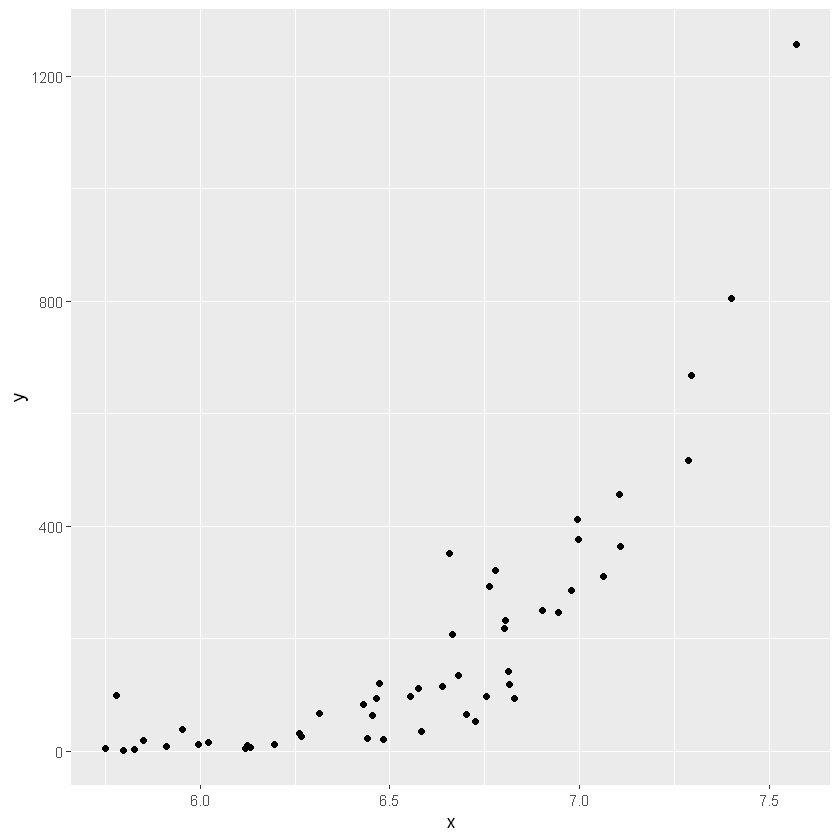

In [76]:
data(murders)
x <- log10(murders$population)
y <- murders$total
qplot(x, y)

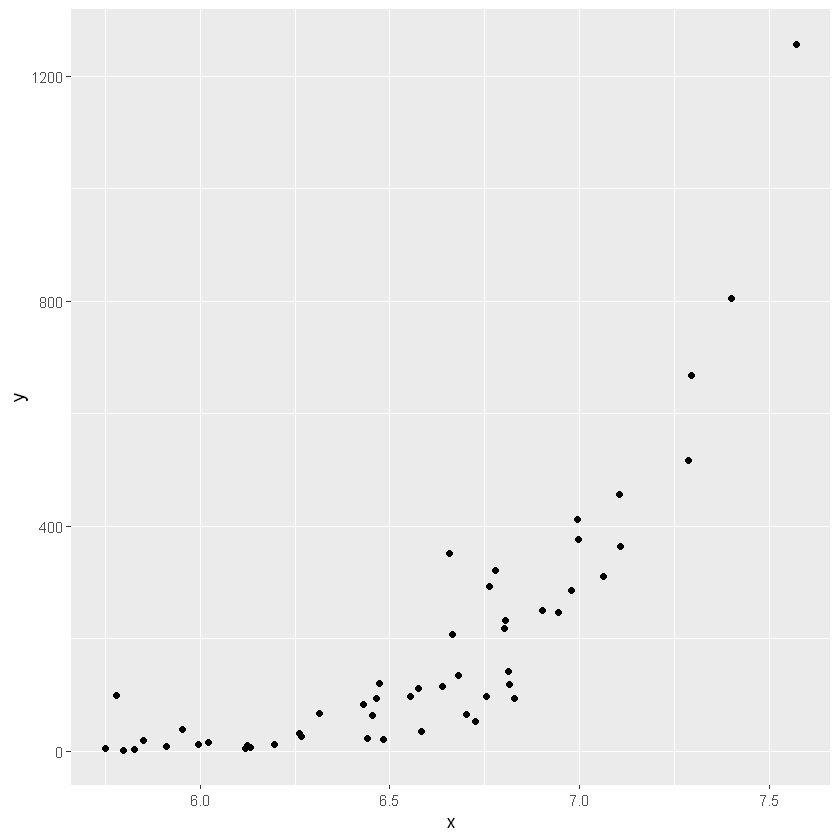

In [81]:
# same in ggplot, # you need to create dtaframe first before proceeding
data.frame(x = x, y = y) %>% 
  ggplot(aes(x, y)) +
  geom_point()

### Grids


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


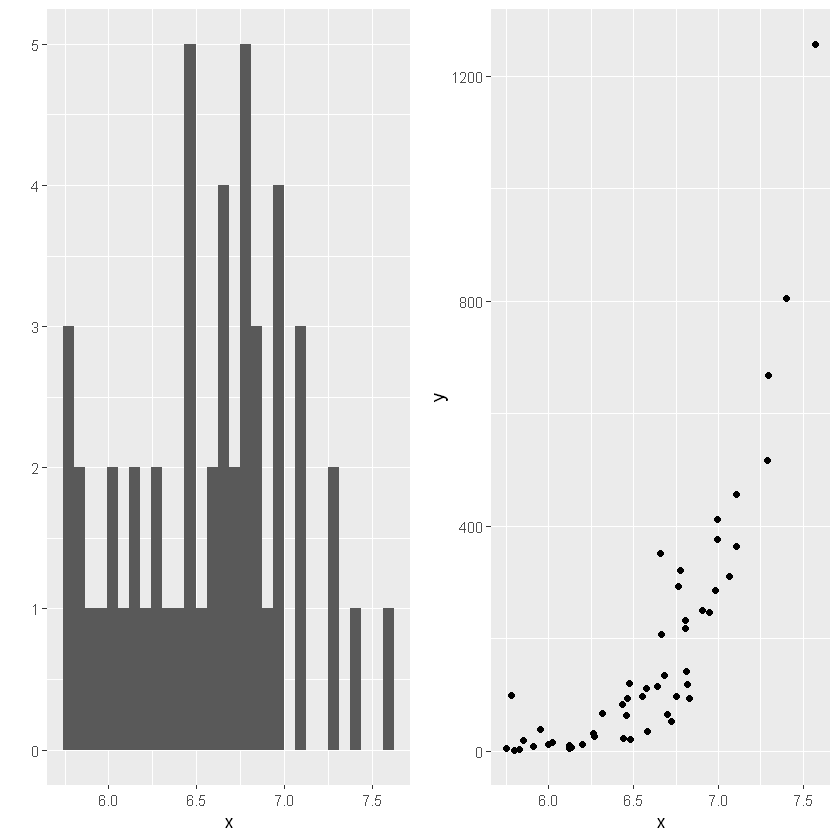

In [85]:
library(gridExtra)
p1 <- qplot(x)
p2 <- qplot(x,y)
grid.arrange(p1, p2, ncol = 2)